# **1. Perkenalan Dataset**


Tahap pertama, anda harus mencari dan menggunakan dataset **tanpa label** dengna ketentuan sebagai berikut :

1. Sumber Dataset:
  Dataset bersumber dari Kaggle dengan link berikut ini : [Dataset Kaggle](https://www.kaggle.com/datasets/zabihullah18/students-social-network-profile-clustering)
2. Ketentuan Dataset:
  - Tanpa Label
  - Jumlah baris : Terdiri dari 15000
  - Tipe data : dataset mengandung data kategorikal (gender) dan numerikal
  - Jumlah kolom : dataset memiliki 40 kolom.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Import dataset ke dalam bentuk dataframe berdasarkan link raw github
Melakukan pemastian bahwa data sudah berhasil masuk ke dataframe

In [34]:
file_path = "https://raw.githubusercontent.com/Marsello-or/dataset_dicoding_pemula/refs/heads/main/03_Clustering_Marketing.csv"
df = pd.read_csv(file_path)

In [35]:
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


# **4. Exploratory Data Analysis (EDA)**

### Overview Data

1. Meninjau jumlah baris dan kolom yang ada dalam dataset yang digunakan
2. Mengidentifikasi jenis data yang ada di setiap kolom

In [36]:
df.head(15)

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.168,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2007,NaN,NaN,21,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


### Jumlah Kolom dan Baris

1. Dataframe terdiri dari 10000 baris
2. Dataframe terdiri dari 15 kolom

In [37]:
df.shape

(15000, 40)

### Jenis data

**Jenis data** yang digunakan terdiri dari numerikal dan kategorikal, beberapa fitur data yang berjenis numerikal :
Fitur dan kolom selain gender

Untuk fitur kategorikal :     
1. Gender

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

### Mencari Distribusi Fitur
Menganalisis distribusi

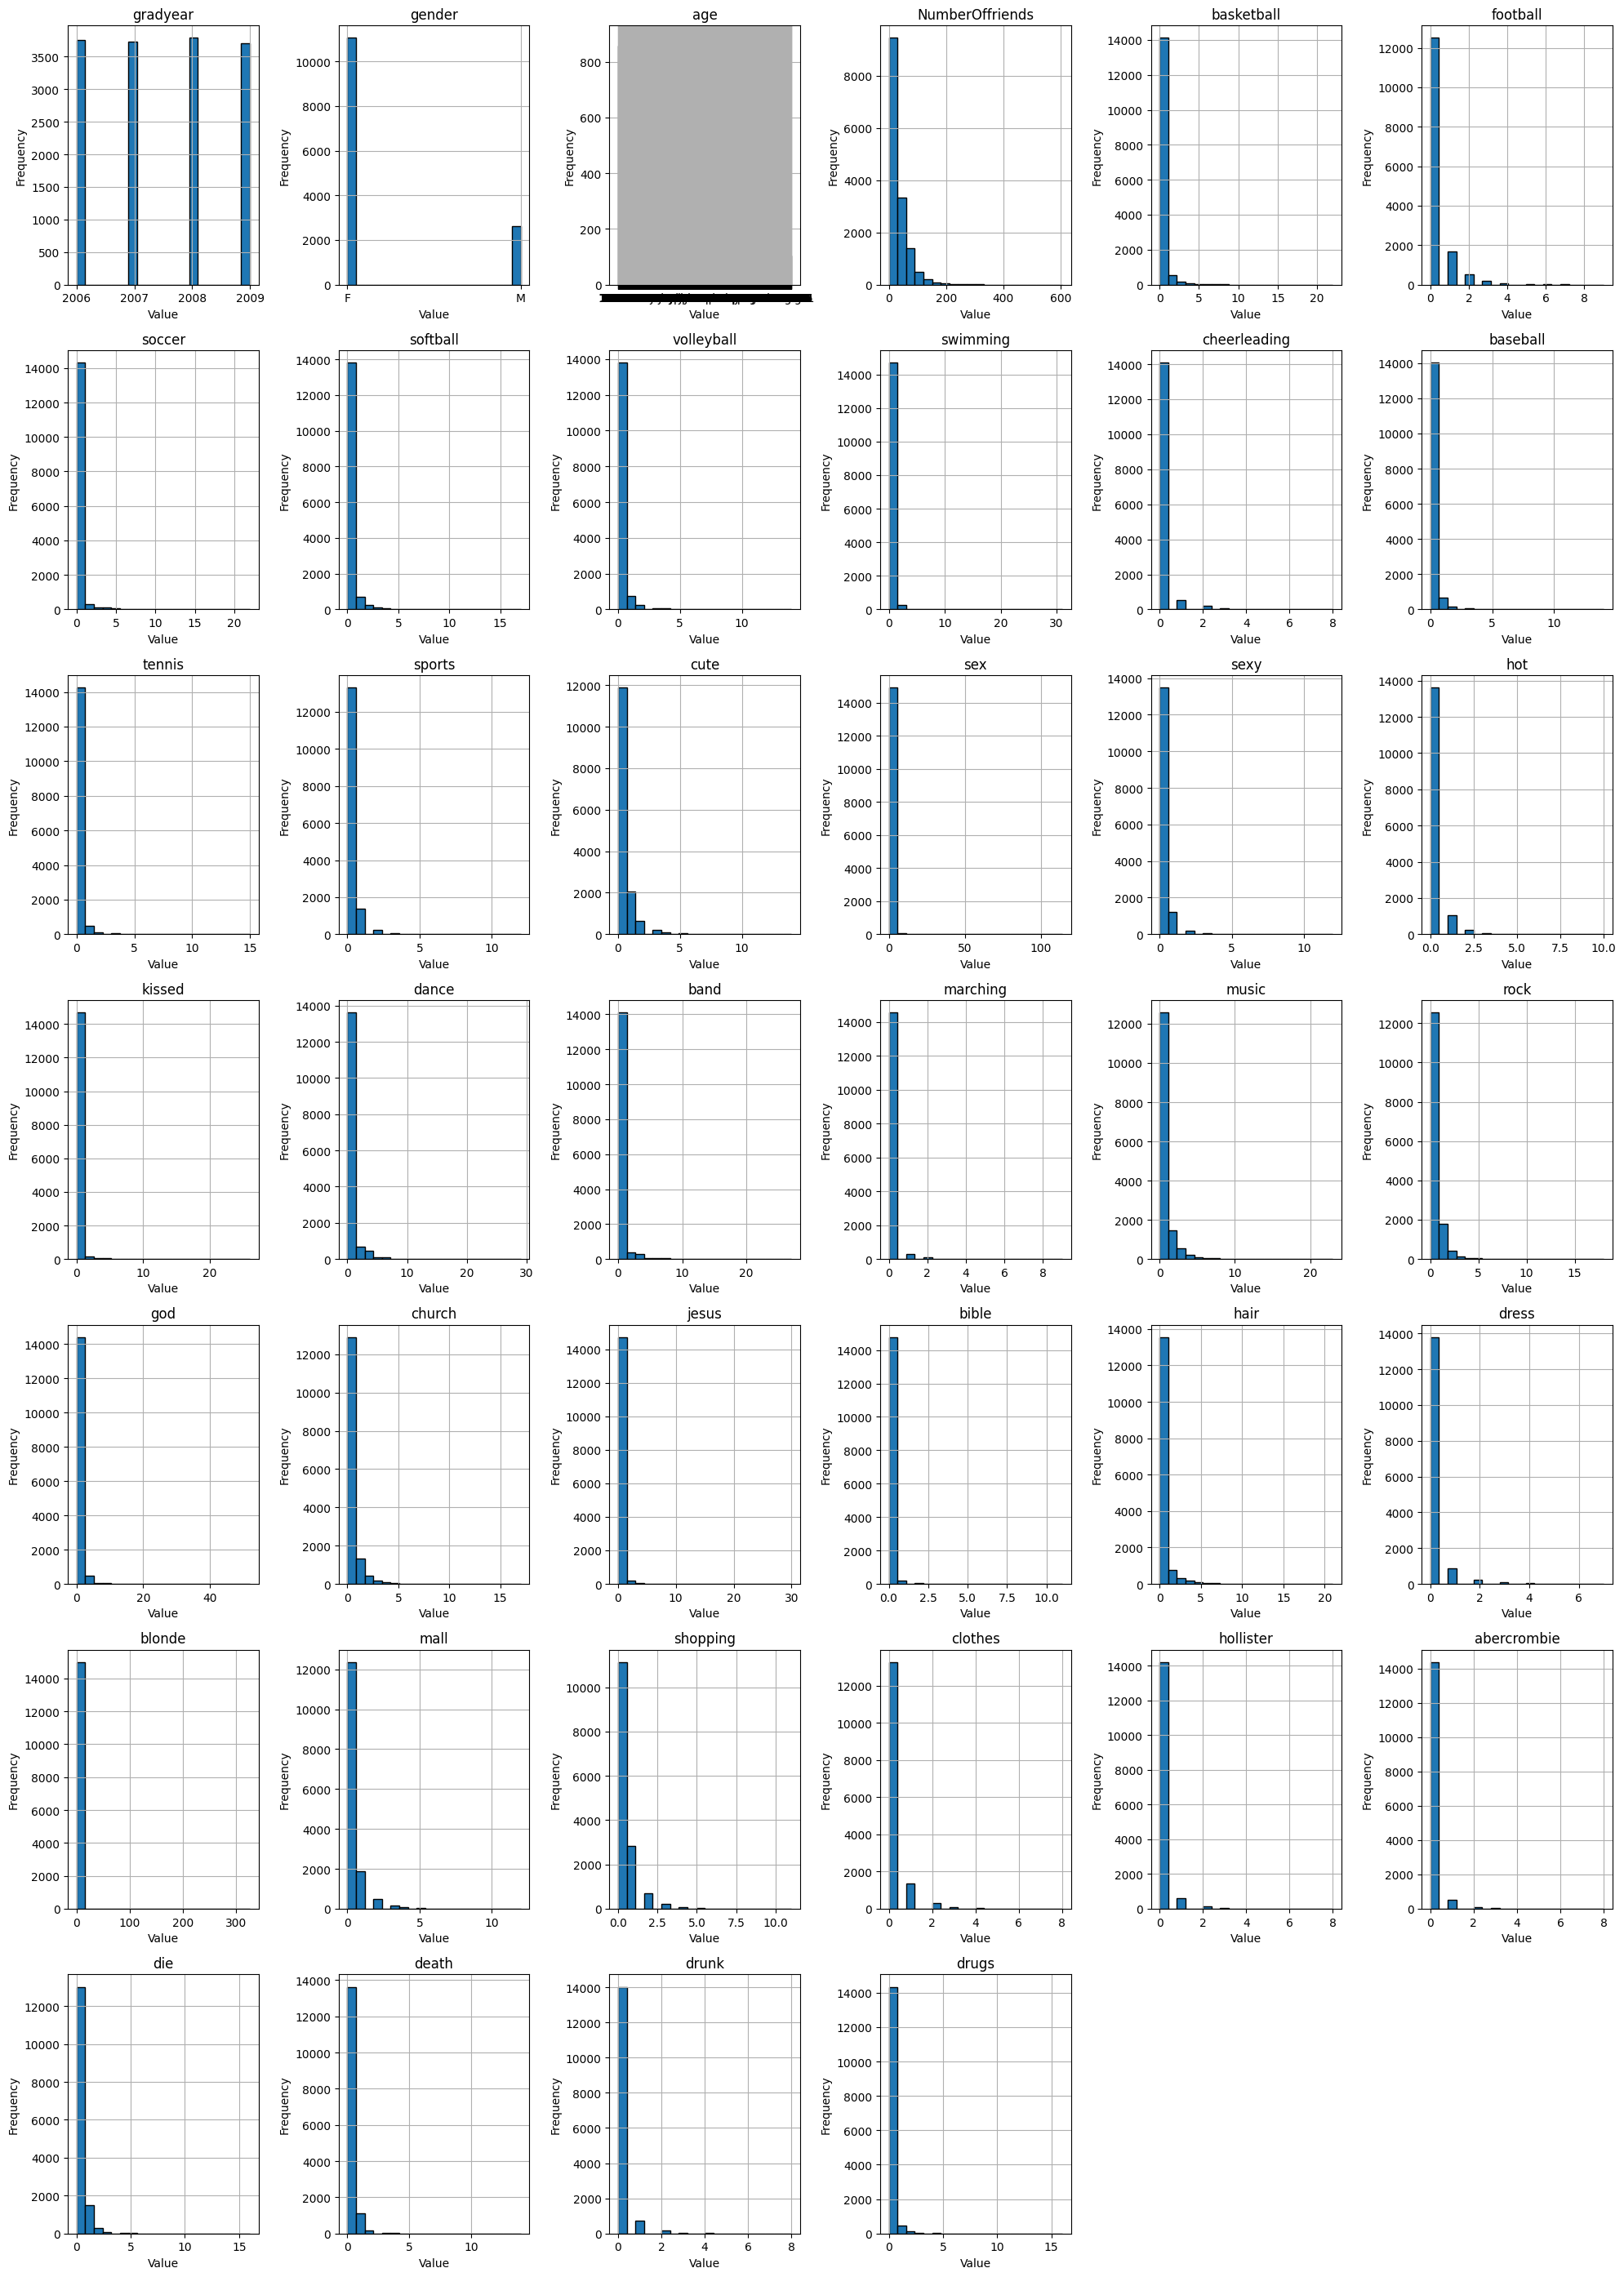

In [39]:
num_vars = df.shape[1]

n_cols = 6
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Kesimpulan dari analisis distribusi:
1. Distribusi right skewed
2. Distribusi Biner (Kategori dengan Dominasi Satu Nilai)
3. Standarisasi akan sangat diperlukan

### Missing Values

In [40]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_values)
missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64


,Missing Values,Percentage
age,2496,16.640000
gender,1337,8.913333


### Data Cleaning
Proses pembersihan data yang kosong dan juga pembersihan dari fitur yang tidak akan digunakan dalam proses clustering

In [41]:
df = df.dropna(subset=['age'])
df = df.dropna(subset=['gender'])
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].median())
df = df.drop(columns=['gradyear'], errors='ignore')

In [42]:
df.head(5)

,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,F,17.410,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,F,17.511,41,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,F,16.657,1,0,0,0,0,0,1,0,...,0,0,0,3,0,0,0,0,0,0
5,M,18.034,32,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M,18.530,18,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df['age'] = round(df['age'])
df.head(10)

,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,F,17.0,49,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,F,18.0,41,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,F,17.0,1,0,0,0,0,0,1,0,...,0,0,0,3,0,0,0,0,0,0
5,M,18.0,32,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M,19.0,18,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,F,19.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,F,19.0,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,M,17.0,89,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15,F,18.0,37,0,1,0,8,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,F,16.0,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12042 entries, 1 to 14999
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           12042 non-null  object 
 1   age              12042 non-null  float64
 2   NumberOffriends  12042 non-null  int64  
 3   basketball       12042 non-null  int64  
 4   football         12042 non-null  int64  
 5   soccer           12042 non-null  int64  
 6   softball         12042 non-null  int64  
 7   volleyball       12042 non-null  int64  
 8   swimming         12042 non-null  int64  
 9   cheerleading     12042 non-null  int64  
 10  baseball         12042 non-null  int64  
 11  tennis           12042 non-null  int64  
 12  sports           12042 non-null  int64  
 13  cute             12042 non-null  int64  
 14  sex              12042 non-null  int64  
 15  sexy             12042 non-null  int64  
 16  hot              12042 non-null  int64  
 17  kissed           

### Mencari Korelasi Fitur

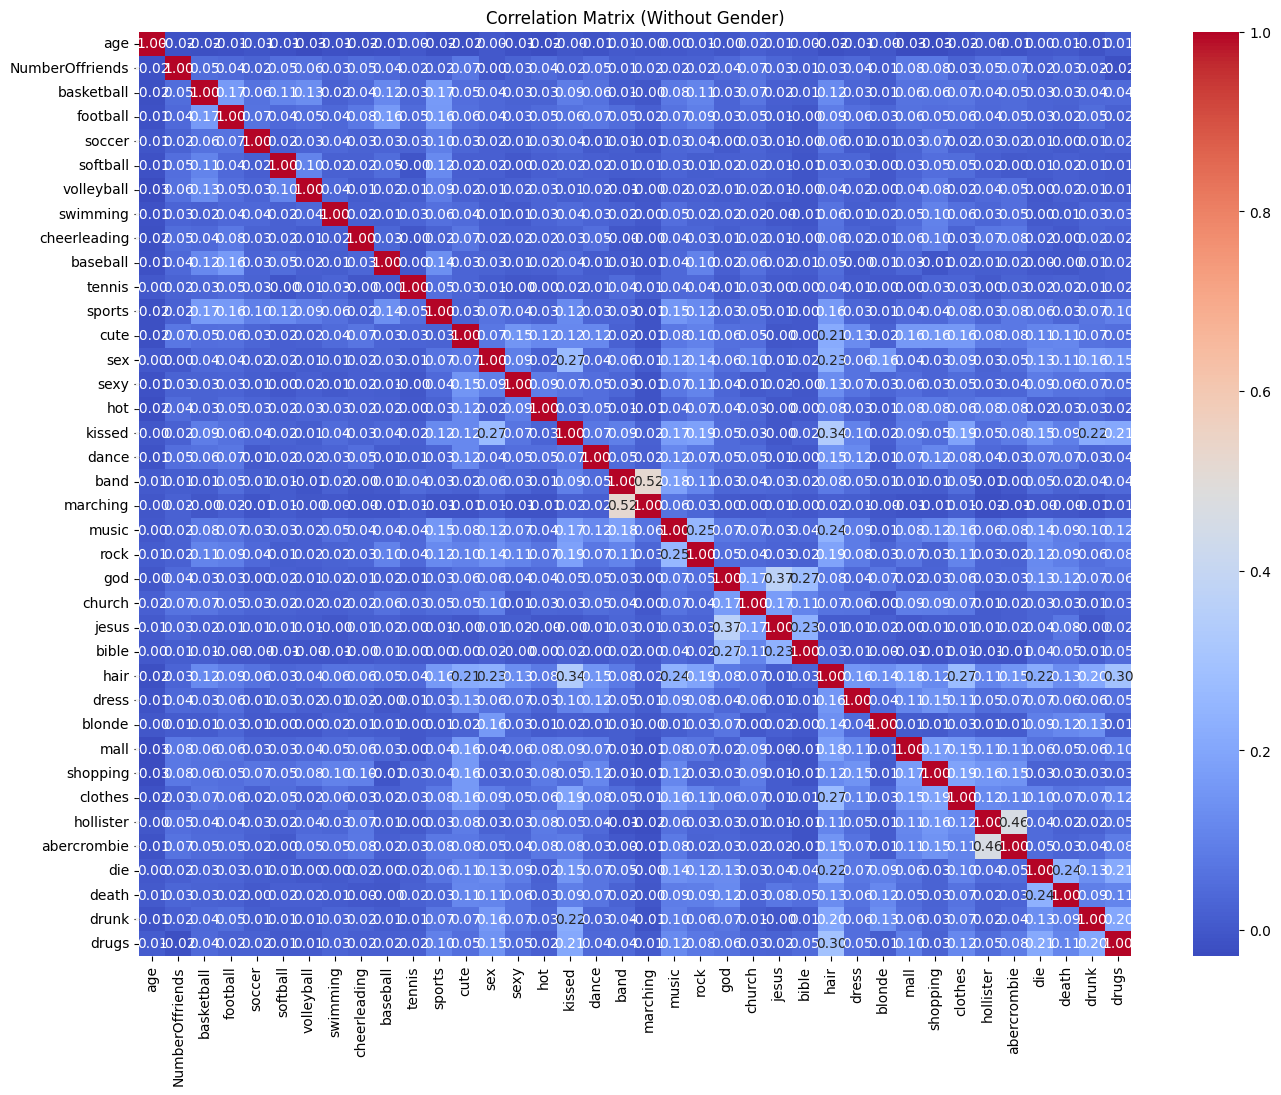

In [45]:
# Hapus kolom 'Gender'
df_no_gender = df.drop('gender', axis=1)

correlation_matrix = df_no_gender.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Without Gender)')
plt.show()


1. **Korelasi Umumnya Rendah** – Sebagian besar variabel memiliki korelasi < 0.2, menunjukkan hubungan yang sangat lemah antar fitur.  

2. **Beberapa Variabel Berkorelasi Tinggi** – Pasangan seperti *"sexy & hot" (0.99)*, *"marching & band" (0.52)*, dan *"drunk & drugs" (0.26)* menunjukkan keterkaitan yang lebih kuat.  

3. **Banyak Variabel Tidak Berhubungan** – Variabel olahraga dan minat lainnya tidak menunjukkan hubungan yang signifikan satu sama lain.  

4. **Implikasi untuk Clustering** – Korelasi rendah dapat membuat sulitnya menemukan pola yang jelas, sehingga teknik seperti PCA atau feature selection bisa dipertimbangkan.

# **5. Data Preprocessing**

Terdapat data yang kosong sebanyak 1337 row pada kolom gender, dan juga sebanyak 2496 row pada kolom age, sehingga harus dihapus rownya atau justru diisi dengna metode mode atau interpolasi

### Proses encoding data kategorikal

In [46]:
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True)

Proses encoding dilakukan untuk merubah data tipe kategorikal menjadi numerikal agar bisa diproses oleh algoritma, untuk features gender yang merupakan kolom kategorikal dari jenis kelamin.

In [47]:
print(df_encoded)

        age  NumberOffriends  basketball  football  soccer  softball  \
1      17.0               49           0         0       1         0   
2      18.0               41           0         0       0         0   
4      17.0                1           0         0       0         0   
5      18.0               32           0         5       0         0   
6      19.0               18           0         0       0         0   
...     ...              ...         ...       ...     ...       ...   
14995  16.0               21           0         0       0         0   
14996  17.0               50           0         0       0         0   
14997  18.0               32           0         0       0         0   
14998  18.0               20           0         0       0         0   
14999  16.0               25           0         0       7         0   

       volleyball  swimming  cheerleading  baseball  ...  mall  shopping  \
1               0         1             0         0  ...   

In [48]:
df_encoded.shape

(12042, 39)

### Proses Normalisasi dan Standarisasi

In [49]:
# Standardization
scaler = StandardScaler()
df_sample = scaler.fit_transform(df_encoded)

Proses normalisasi dan standarisasi dilakukan, metode yang dipilih disesuaikan dengna jenis dan sebaran data yang telah dianalisis di tahap sebelumnya.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pembangunan model dengan metode KMeans, DBSCan, Hierarchical Clustering, dan Agglomerative Clustering
Pemilihan cluster dilakukan secara sisir sesuai dengan cluster antara 2 sampai 15, didapatkan nilai terbaik yaitu 2

### K-means

In [50]:
best_n_clusters = None
best_score = 0
best_labels = None

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_sample)
    score = silhouette_score(df_sample, labels)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        best_labels = labels

    if score >= 0.7:
        break

### Agglomerative Clustering

In [51]:
best_n_clusters_agglo = None
best_score_agglo = 0
for n_clusters in range(2, 15):
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglo = agglo.fit_predict(df_sample)
    score_agglo = silhouette_score(df_sample, labels_agglo)

    if score_agglo > best_score_agglo:
        best_score_agglo = score_agglo
        best_n_clusters_agglo = n_clusters

agglo = AgglomerativeClustering(n_clusters=best_n_clusters_agglo)
labels_agglo = agglo.fit_predict(df_sample)
score_agglo = silhouette_score(df_sample, labels_agglo)

### DBSCAN

In [52]:
best_eps = None
best_min_samples = None
best_dbscan_score = -1
best_labels_dbscan = None

for eps in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(2, 15):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(df_sample)

        n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

        if n_clusters_dbscan > 1:

            valid_samples = labels_dbscan != -1
            if np.sum(valid_samples) > 0:
                score_dbscan = silhouette_score(df_sample[valid_samples], labels_dbscan[valid_samples])

                if score_dbscan > best_dbscan_score:
                    best_dbscan_score = score_dbscan
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels_dbscan = labels_dbscan


### Hierarchical Clustering

In [53]:
linkage_matrix = sch.linkage(df_sample, method='ward')
best_n_clusters_hierarchical = None
best_score_hierarchical = 0

for n_clusters in range(2, 15):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels_hierarchical = hierarchical.fit_predict(df_sample)
    silhouette_hierarchical = silhouette_score(df_sample, labels_hierarchical)
    if silhouette_hierarchical > best_score_hierarchical:
        best_score_hierarchical = silhouette_hierarchical
        best_n_clusters_hierarchical = n_clusters

hierarchical = AgglomerativeClustering(n_clusters=best_n_clusters_hierarchical)
labels_hierarchical = hierarchical.fit_predict(df_sample)
silhouette_hierarchical = silhouette_score(df_sample, labels_hierarchical)

## **b. Evaluasi Model Clustering**

1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

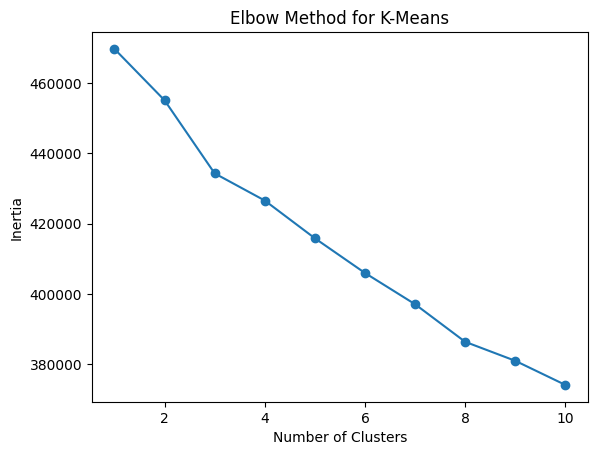

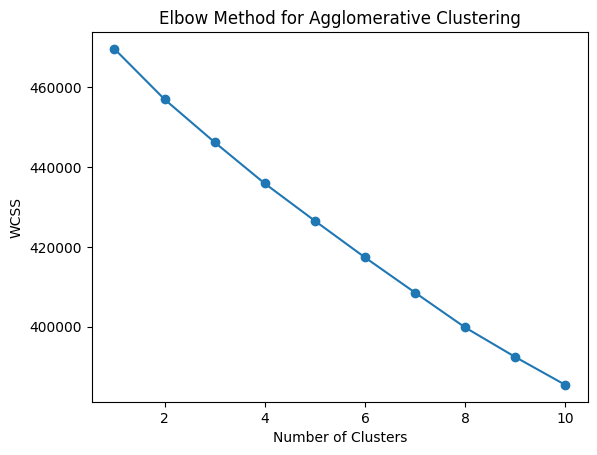

In [54]:
# Elbow Method for K-Means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_sample)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


wcss = []
for i in range(1, 11):
    agglo = AgglomerativeClustering(n_clusters=i)
    labels_agglo = agglo.fit_predict(df_sample)
    cluster_centers = np.array([df_sample[labels_agglo == j].mean(axis=0) for j in range(i)])
    distances = [np.linalg.norm(df_sample[k] - cluster_centers[labels_agglo[k]]) for k in range(len(df_sample))]
    wcss.append(np.sum(np.square(distances)))

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
print(f'K-Means Optimal Number of Clusters: {best_n_clusters}')
print(f'K-Means Best Silhouette Score: {best_score}')

K-Means Optimal Number of Clusters: 2
K-Means Best Silhouette Score: 0.37414677319593936


In [56]:
print(f'Agglomerative Clustering Optimal Number of Clusters: {best_n_clusters_agglo}')
print(f'Agglomerative Clustering Silhouette Score: {score_agglo}')

Agglomerative Clustering Optimal Number of Clusters: 2
Agglomerative Clustering Silhouette Score: 0.9328849879733265


In [57]:
if best_dbscan_score > -1:
    print(f'DBSCAN Best Silhouette Score: {best_dbscan_score} (eps={best_eps}, min_samples={best_min_samples})')
else:
    print('DBSCAN did not form multiple valid clusters, silhouette score is not applicable.')

DBSCAN Best Silhouette Score: 0.554085144680466 (eps=0.1, min_samples=14)


In [58]:
print(f'Hierarchical Clustering Optimal Number of Clusters: {best_n_clusters_hierarchical}')
print(f'Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}')

Hierarchical Clustering Optimal Number of Clusters: 2
Hierarchical Clustering Silhouette Score: 0.9328849879733265


## **c. Feature Selection (Opsional)**

In [59]:
X = df_encoded

X_for_selection = df_sample
y = best_labels

selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_for_selection, y)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = [df_encoded.columns[i] for i in selected_feature_indices]
print("Selected Features:", selected_feature_names)

df_selected = df_encoded[selected_feature_names]

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected)

df_selected_sample = resample(df_selected_scaled, n_samples=5000, random_state=42)

best_n_clusters_selected = None
best_score_selected = 0
best_labels_selected = None

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels_selected = kmeans.fit_predict(df_selected_sample)
    score_selected = silhouette_score(df_selected_sample, labels_selected)

    if score_selected > best_score_selected:
        best_score_selected = score_selected
        best_n_clusters_selected = n_clusters
        best_labels_selected = labels_selected

best_n_clusters_agglo_selected = None
best_score_agglo_selected = 0

for n_clusters in range(2, 15):
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglo_selected = agglo.fit_predict(df_selected_sample)
    score_agglo_selected = silhouette_score(df_selected_sample, labels_agglo_selected)

    if score_agglo_selected > best_score_agglo_selected:
        best_score_agglo_selected = score_agglo_selected
        best_n_clusters_agglo_selected = n_clusters

agglo = AgglomerativeClustering(n_clusters=best_n_clusters_agglo_selected)
labels_agglo_selected = agglo.fit_predict(df_selected_sample)
score_agglo_selected = silhouette_score(df_selected_sample, labels_agglo_selected)

best_eps_selected = None
best_min_samples_selected = None
best_dbscan_score_selected = -1
best_labels_dbscan_selected = None

for eps in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(2, 15):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan_selected = dbscan.fit_predict(df_selected_sample)

        n_clusters_dbscan_selected = len(set(labels_dbscan_selected)) - (
            1 if -1 in labels_dbscan_selected else 0
        )

        if n_clusters_dbscan_selected > 1:
            valid_samples_selected = labels_dbscan_selected != -1
            if np.sum(valid_samples_selected) > 0:
                score_dbscan_selected = silhouette_score(
                    df_selected_sample[valid_samples_selected],
                    labels_dbscan_selected[valid_samples_selected],
                )

                if score_dbscan_selected > best_dbscan_score_selected:
                    best_dbscan_score_selected = score_dbscan_selected
                    best_eps_selected = eps
                    best_min_samples_selected = min_samples
                    best_labels_dbscan_selected = labels_dbscan_selected

linkage_matrix = sch.linkage(df_selected_sample, method='ward')
best_n_clusters_hierarchical_selected = None
best_score_hierarchical_selected = 0

for n_clusters in range(2, 15):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels_hierarchical_selected = hierarchical.fit_predict(df_selected_sample)
    silhouette_hierarchical_selected = silhouette_score(
        df_selected_sample, labels_hierarchical_selected
    )
    if silhouette_hierarchical_selected > best_score_hierarchical_selected:
        best_score_hierarchical_selected = silhouette_hierarchical_selected
        best_n_clusters_hierarchical_selected = n_clusters

hierarchical = AgglomerativeClustering(n_clusters=best_n_clusters_hierarchical_selected)
labels_hierarchical_selected = hierarchical.fit_predict(df_selected_sample)
silhouette_hierarchical_selected = silhouette_score(
    df_selected_sample, labels_hierarchical_selected
)

print(f'K-Means with Selected Features: Optimal Number of Clusters: {best_n_clusters_selected}')
print(f'K-Means with Selected Features: Best Silhouette Score: {best_score_selected}')
print(f'Agglomerative Clustering with Selected Features: Optimal Number of Clusters: {best_n_clusters_agglo_selected}')
print(f'Agglomerative Clustering with Selected Features: Silhouette Score: {score_agglo_selected}')
if best_dbscan_score_selected > -1:
    print(f'DBSCAN with Selected Features: Best Silhouette Score: {best_dbscan_score_selected} (eps={best_eps_selected}, min_samples={best_min_samples_selected})')
else:
    print('DBSCAN with Selected Features did not form multiple valid clusters, silhouette score is not applicable.')
print(f'Hierarchical Clustering with Selected Features: Optimal Number of Clusters: {best_n_clusters_hierarchical_selected}')
print(f'Hierarchical Clustering with Selected Features: Silhouette Score: {silhouette_hierarchical_selected}')

Selected Features: ['cute', 'kissed', 'music', 'hair', 'dress', 'mall', 'shopping', 'clothes', 'abercrombie', 'drugs']
K-Means with Selected Features: Optimal Number of Clusters: 2
K-Means with Selected Features: Best Silhouette Score: 0.5400573973116443
Agglomerative Clustering with Selected Features: Optimal Number of Clusters: 3
Agglomerative Clustering with Selected Features: Silhouette Score: 0.4397322742896866
DBSCAN with Selected Features: Best Silhouette Score: 0.9999999993044548 (eps=0.1, min_samples=10)
Hierarchical Clustering with Selected Features: Optimal Number of Clusters: 3
Hierarchical Clustering with Selected Features: Silhouette Score: 0.4397322742896866


Berdasarkan hasil dari proses feature selection terlihat bahwa ke 4 metode yang digunakan semuanya mengalami penurunan nilai silhouette score yang menandakan bahwa fitur yang digunakan tidak selalu baik apabila di optimalisasi, kecuali dengan menggunakan metode k means yang ditandai dengan meningkatknya nilai silhouette score sebesar 0.1 (kurang lebih)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

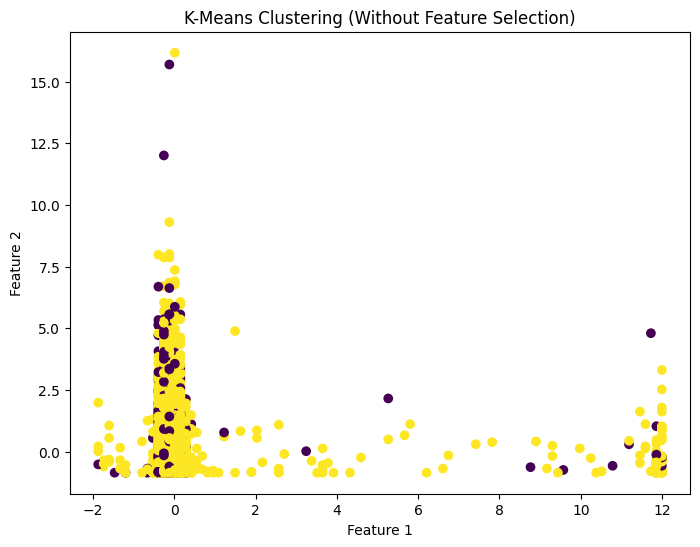

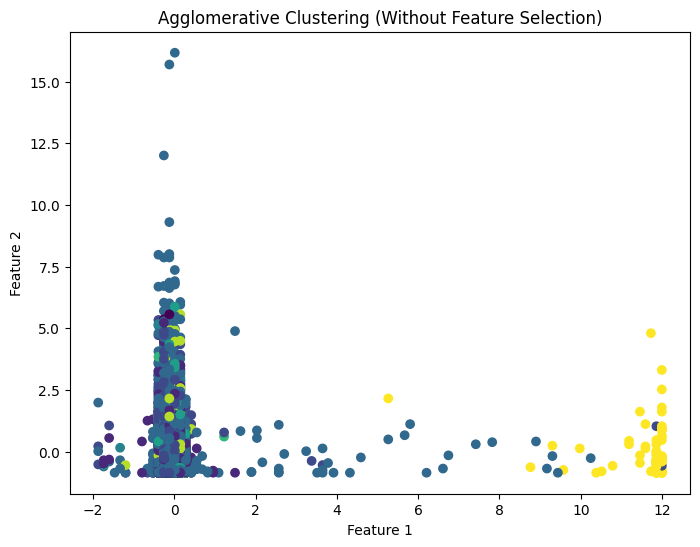

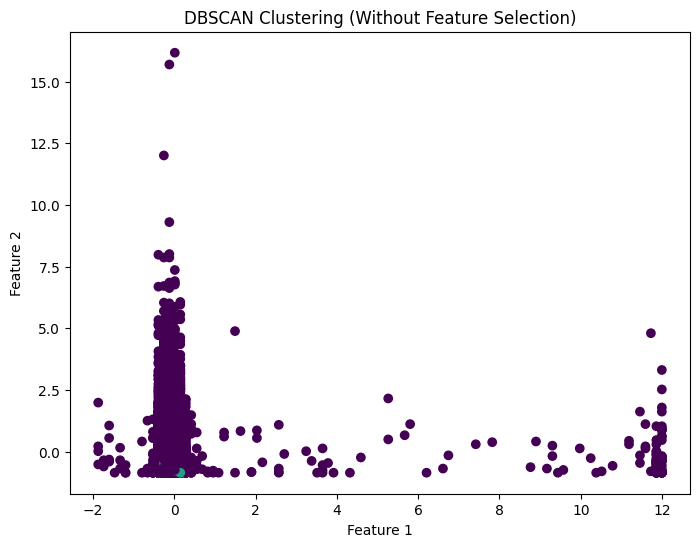

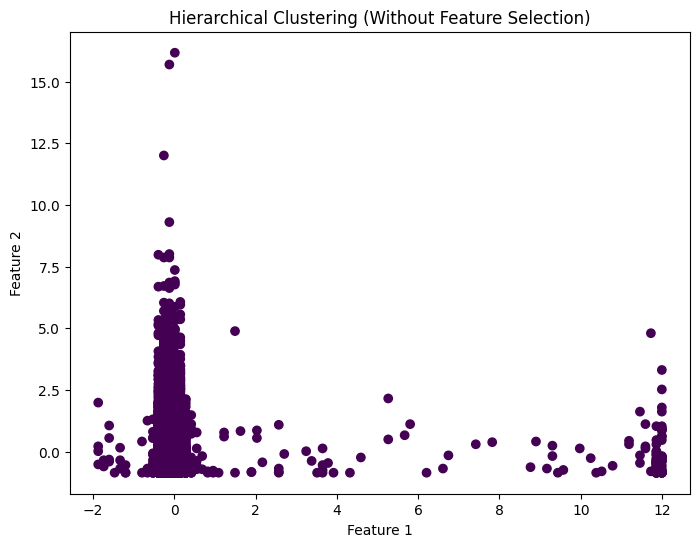

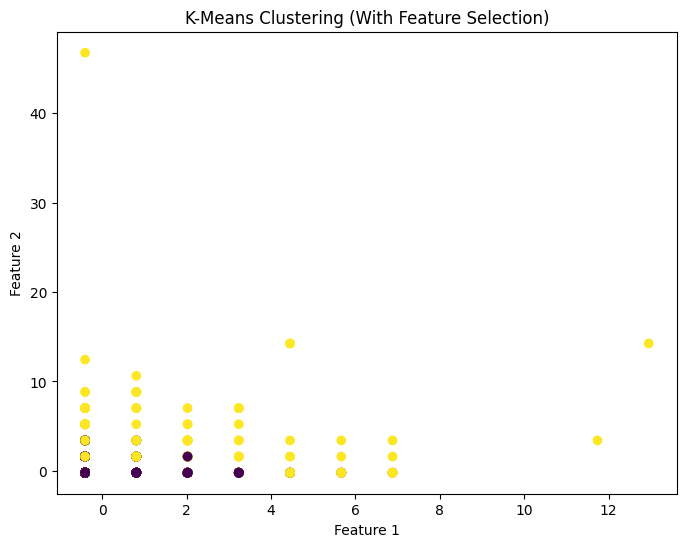

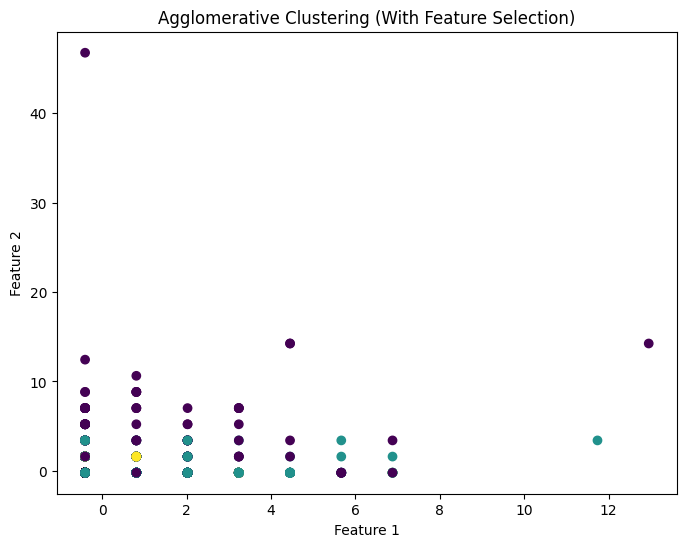

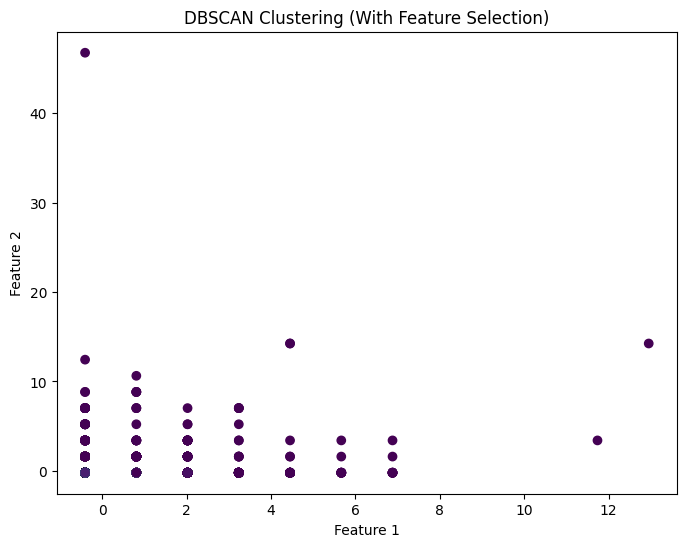

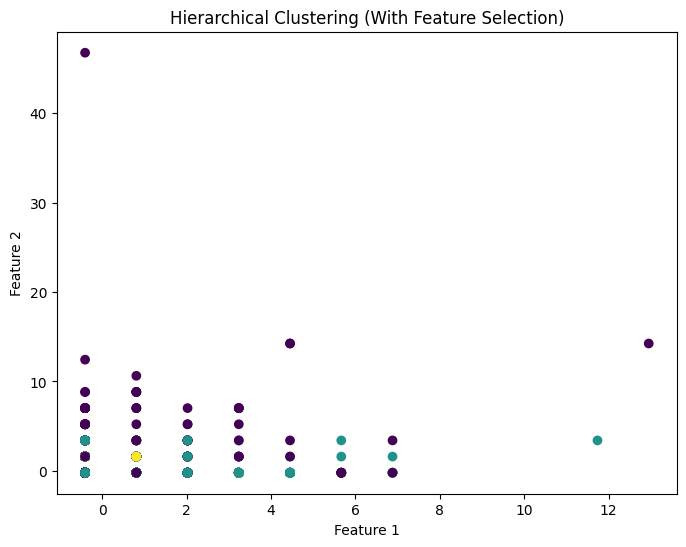

In [60]:

plt.figure(figsize=(8, 6))
plt.scatter(df_sample[:, 0], df_sample[:, 1], c=best_labels, cmap='viridis')
plt.title('K-Means Clustering (Without Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_sample[:, 0], df_sample[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative Clustering (Without Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_sample[:, 0], df_sample[:, 1], c=best_labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering (Without Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_sample[:, 0], df_sample[:, 1], c=labels_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering (Without Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_sample[:, 0], df_selected_sample[:, 1], c=best_labels_selected, cmap='viridis')
plt.title('K-Means Clustering (With Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_sample[:, 0], df_selected_sample[:, 1], c=labels_agglo_selected, cmap='viridis')
plt.title('Agglomerative Clustering (With Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_sample[:, 0], df_selected_sample[:, 1], c=best_labels_dbscan_selected, cmap='viridis')
plt.title('DBSCAN Clustering (With Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_sample[:, 0], df_selected_sample[:, 1], c=labels_hierarchical_selected, cmap='viridis')
plt.title('Hierarchical Clustering (With Feature Selection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [61]:
silhouette_scores = pd.DataFrame({
    'Model': ['K-Means', 'Agglomerative', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score (Without Feature Selection)': [best_score, score_agglo, best_dbscan_score, silhouette_hierarchical],
    'Silhouette Score (With Feature Selection)': [best_score_selected, score_agglo_selected, best_dbscan_score_selected, silhouette_hierarchical_selected]
})

silhouette_scores

,Model,Silhouette Score (Without Feature Selection),Silhouette Score (With Feature Selection)
0,K-Means,0.374147,0.540057
1,Agglomerative,0.932885,0.439732
2,DBSCAN,0.554085,1.000000
3,Hierarchical,0.932885,0.439732


Berdasarkan hasil analisis dari silhouette score di atas terbukti bahwa metode yang paling bagus untuk digunakan adalah metode dbscan dengan nilai 0.93 tanpa feature selection dan bahkan menyentuh angka 1 dengan melewati feature selection

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [62]:
numerical_features = [col for col in df_encoded.columns if col not in ['gender_M', 'gender']]
scaler = StandardScaler()
df_sample_numerical = scaler.fit_transform(df_encoded[numerical_features])

df_decoded = df_encoded.copy()
df_sample = pd.DataFrame(df_sample_numerical, columns=numerical_features)

df_sample['gender'] = np.where(df_decoded['gender_M'] == 1, 'M', 'F')
numerical_features = [col for col in df_encoded.columns if col not in ['gender_M', 'gender']]

df_inverse_scaled_numerical = scaler.inverse_transform(df_sample[numerical_features])
df_inverse_scaled_numerical = pd.DataFrame(df_inverse_scaled_numerical, columns=numerical_features)

df_inverse_scaled = pd.concat([df_inverse_scaled_numerical, df_sample['gender']], axis=1)

df_inverse_scaled['cluster'] = best_labels

df_inverse_scaled

,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender,cluster
0,17.0,49.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.775558e-17,0.0,1.0,0.0,F,1
1,18.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.775558e-17,0.0,1.0,1.0,F,0
2,17.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.775558e-17,0.0,0.0,0.0,F,0
3,18.0,32.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.775558e-17,0.0,0.0,0.0,M,1
4,19.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.775558e-17,0.0,0.0,0.0,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12037,16.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.775558e-17,1.0,0.0,0.0,F,1
12038,17.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.775558e-17,1.0,0.0,0.0,F,1
12039,18.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.775558e-17,0.0,0.0,0.0,F,1
12040,18.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.775558e-17,0.0,0.0,0.0,F,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

               age  NumberOffriends  basketball  football    soccer  softball  \
cluster                                                                         
0        17.613720        40.575726    0.658047  0.588391  0.417942  0.347230   
1        17.976939        28.608259    0.205381  0.207943  0.199074  0.131566   

         volleyball  swimming  cheerleading  baseball  ...      mall  \
cluster                                                ...             
0          0.338786  0.294459      0.310290  0.250660  ...  0.817414   
1          0.110969  0.109096      0.068296  0.085444  ...  0.174140   

         shopping   clothes  hollister  abercrombie       die     death  \
cluster                                                                   
0        0.900264  0.569393   0.290237     0.240633  0.541425  0.310818   
1        0.269833  0.077067   0.030847     0.018528  0.121317  0.086627   

            drunk     drugs  gender  
cluster                              
0        

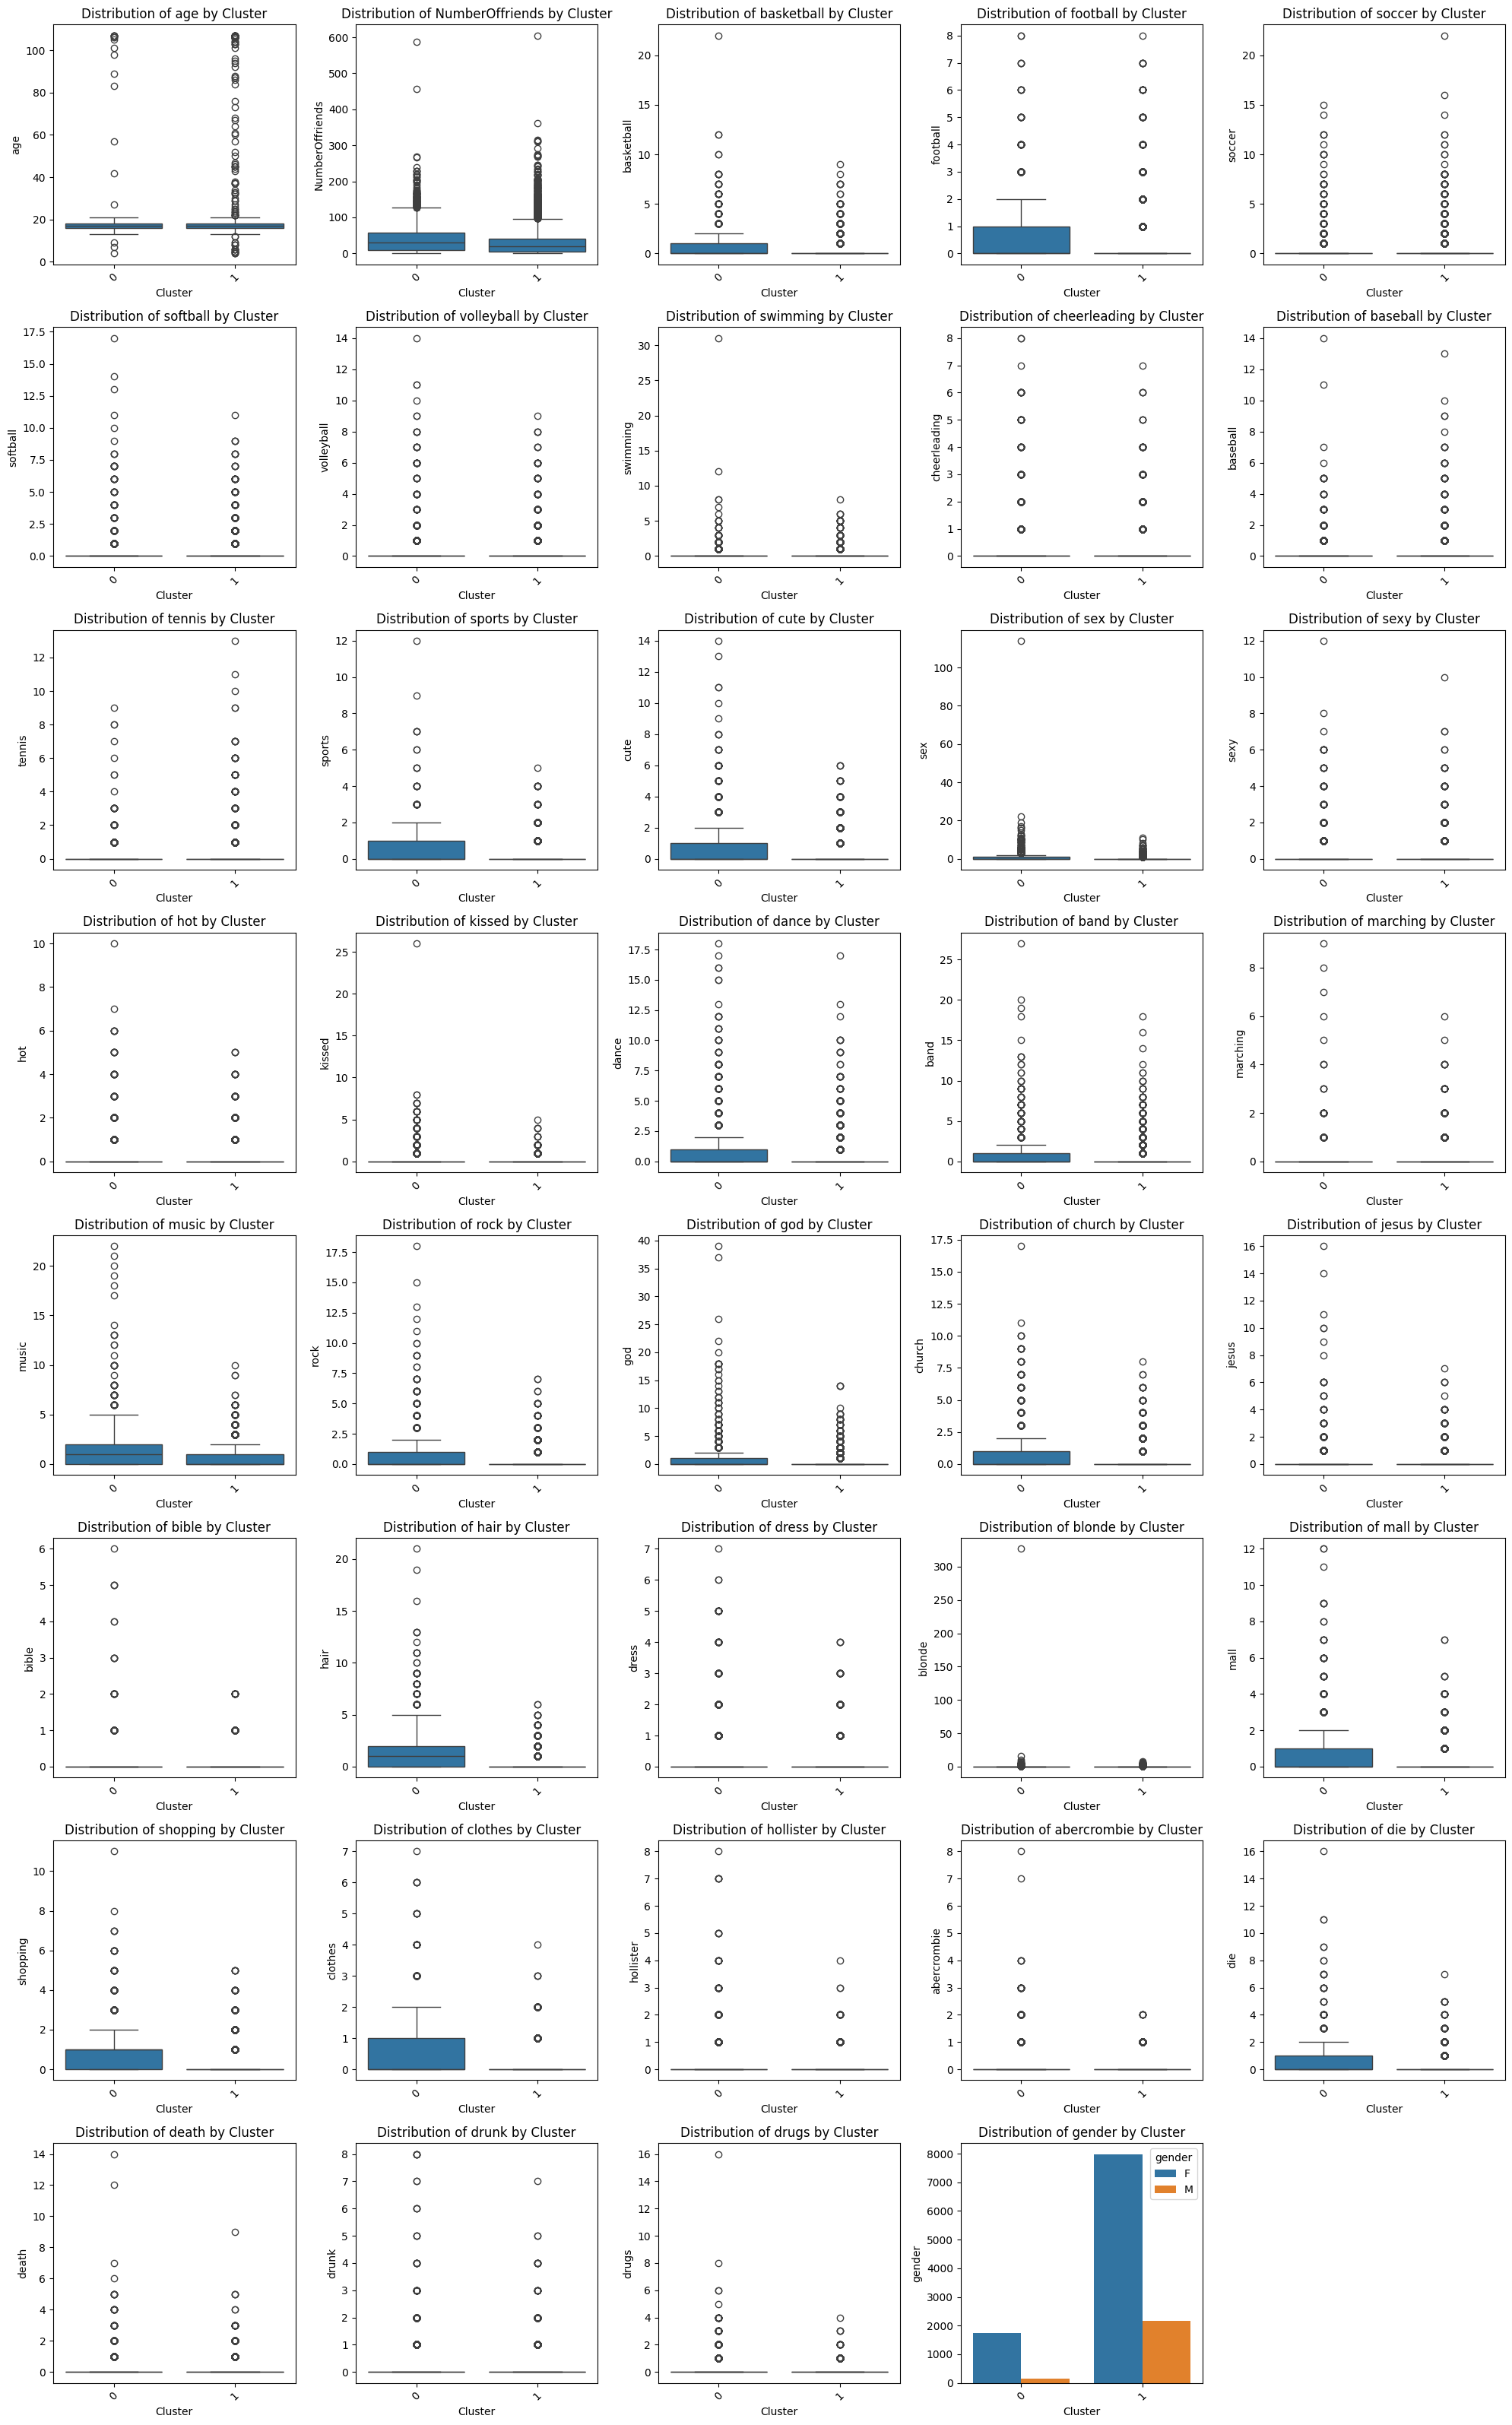

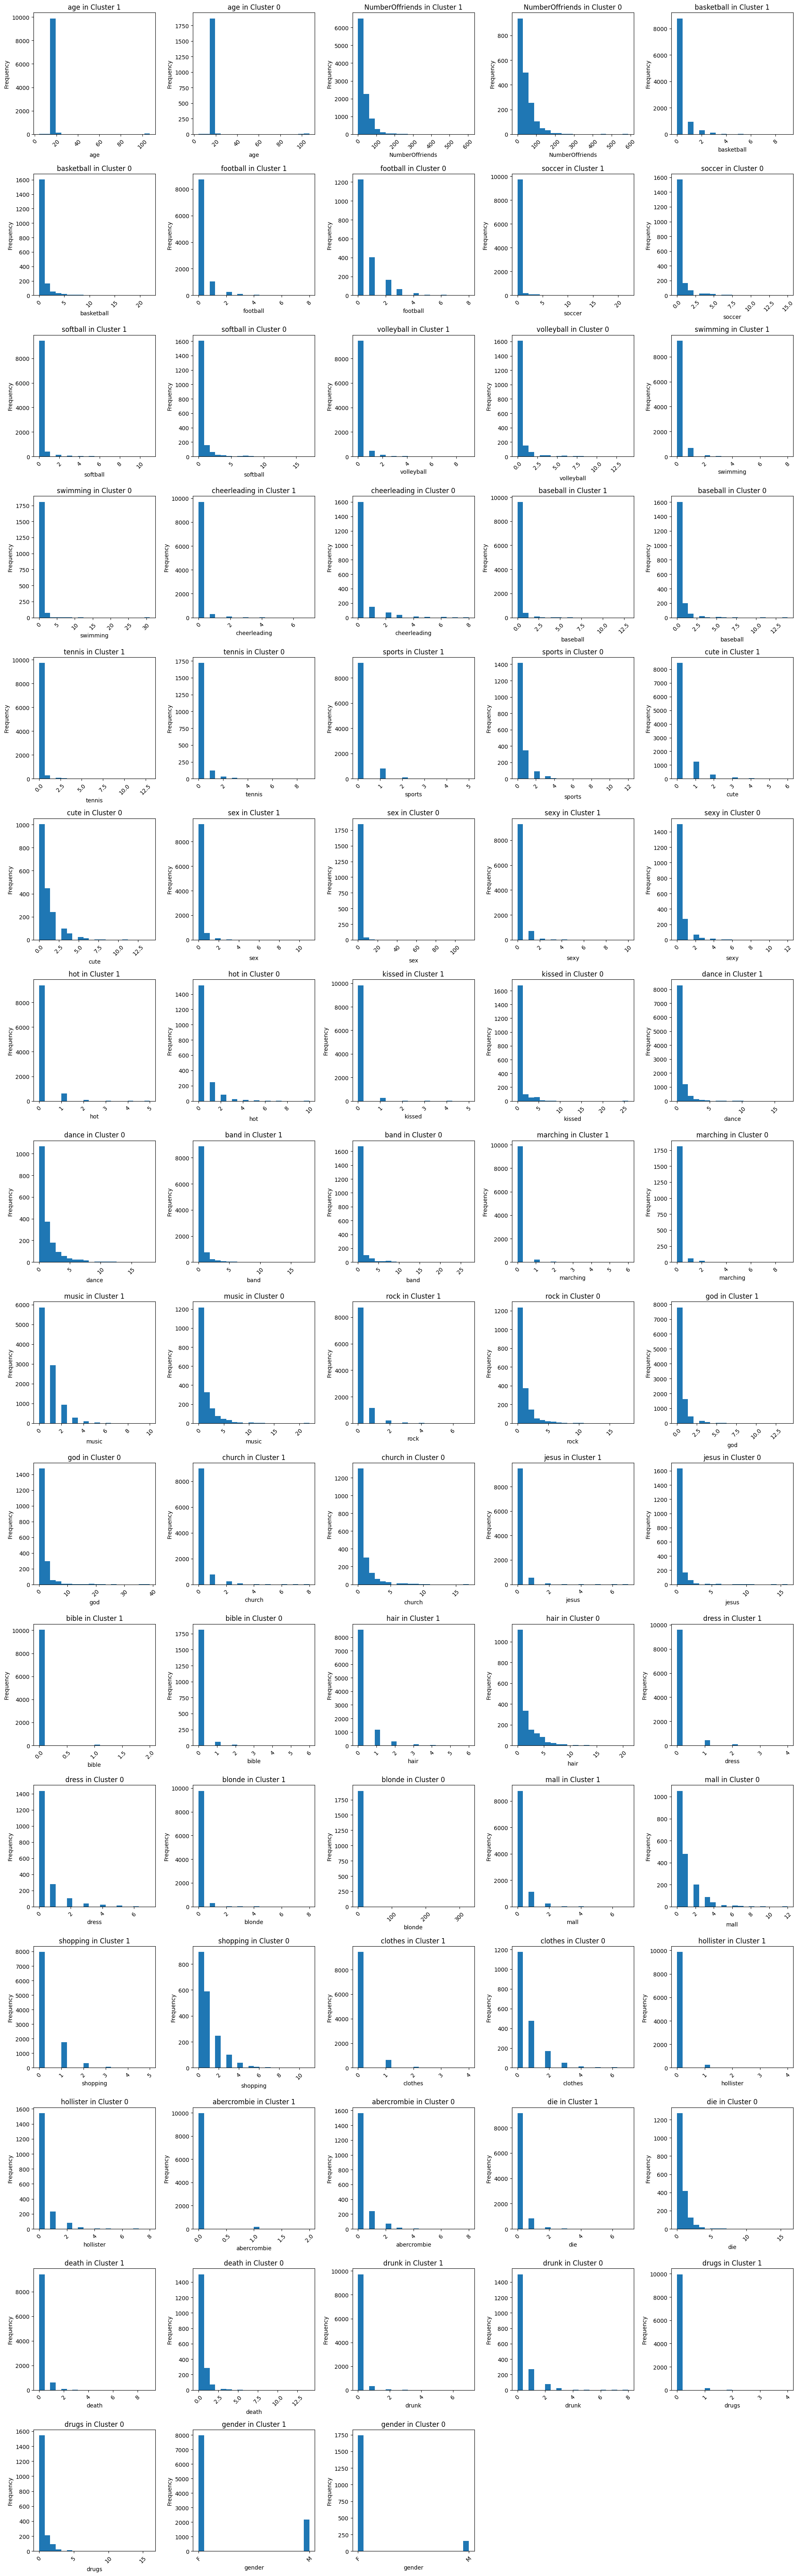

In [63]:
cluster_characteristics = df_inverse_scaled.groupby('cluster').agg({
    col: 'mean' if col != 'gender' else lambda x: x.mode()[0]
    for col in df_inverse_scaled.columns if col != 'cluster'
})

print(cluster_characteristics)

features = df_inverse_scaled.columns[:-1].tolist()

n_features = len(features)
n_cols = 5
n_rows = -(-n_features // n_cols)

plt.figure(figsize=(20, 4*n_rows))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)

    if feature == 'gender':
        sns.countplot(x='cluster', hue=feature, data=df_inverse_scaled)
        plt.title(f'Distribution of {feature} by Cluster')
    else:
        sns.boxplot(x='cluster', y=feature, data=df_inverse_scaled)
        plt.title(f'Distribution of {feature} by Cluster')

    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

n_clusters = len(df_inverse_scaled['cluster'].unique())
n_rows_hist = -(-n_features * n_clusters // n_cols)
plt.figure(figsize=(20, 4*n_rows_hist))

plot_index = 1
for feature in features:
    for cluster in df_inverse_scaled['cluster'].unique():
        plt.subplot(n_rows_hist, n_cols, plot_index)
        plt.hist(df_inverse_scaled[df_inverse_scaled['cluster'] == cluster][feature], bins=20)
        plt.title(f'{feature} in Cluster {cluster}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plot_index += 1

plt.tight_layout()
plt.show()

In [67]:
cluster_means_df = df_inverse_scaled.drop(columns=['gender']).groupby(best_labels).mean()

# Convert the cluster means to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means_df)

# Display the DataFrame
cluster_means_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 1
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2 non-null      float64
 1   NumberOffriends  2 non-null      float64
 2   basketball       2 non-null      float64
 3   football         2 non-null      float64
 4   soccer           2 non-null      float64
 5   softball         2 non-null      float64
 6   volleyball       2 non-null      float64
 7   swimming         2 non-null      float64
 8   cheerleading     2 non-null      float64
 9   baseball         2 non-null      float64
 10  tennis           2 non-null      float64
 11  sports           2 non-null      float64
 12  cute             2 non-null      float64
 13  sex              2 non-null      float64
 14  sexy             2 non-null      float64
 15  hot              2 non-null      float64
 16  kissed           2 non-null      float64
 17  dance            2 non-nu

In [68]:
cluster_means_df

,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,17.613720,40.575726,0.658047,0.588391,0.417942,0.347230,0.338786,0.294459,0.310290,0.250660,...,0.817414,0.900264,0.569393,0.290237,0.240633,0.541425,0.310818,0.319789,0.299736,0.0
1,17.976939,28.608259,0.205381,0.207943,0.199074,0.131566,0.110969,0.109096,0.068296,0.085444,...,0.174140,0.269833,0.077067,0.030847,0.018528,0.121317,0.086627,0.053908,0.021386,1.0


# Interpretasi
# Analisis Karakteristik Cluster dari Model DBScan

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model DBScan.

## Cluster 0:
- Rata-rata usia: -0.041 (lebih muda dibandingkan cluster 1)
- Jumlah teman: 0.284 (lebih tinggi dibandingkan cluster 1)
- Minat dalam olahraga: Lebih tinggi, terutama pada basketball (0.476), football (0.448), soccer (0.194), softball (0.245), volleyball (0.291).
- Keterlibatan dalam aktivitas sosial: Lebih tinggi dalam cheerleading (0.402), dance (0.592), band (0.322), marching band (0.111).
- Minat dalam aspek sosial/relasi: Lebih tinggi dalam "cute" (0.725), "sex" (0.472), "sexy" (0.372), "hot" (0.415), "kissed" (0.697).
- Analisis: Cluster ini lebih aktif dalam olahraga dan kegiatan sosial, dengan tingkat keterlibatan yang tinggi dalam aktivitas ekstrakurikuler. Mereka cenderung lebih sosial, memiliki banyak teman, dan memiliki minat lebih besar dalam aspek hubungan personal.

## Cluster 1:
- Rata-rata usia: 0.008 (sedikit lebih tua dibandingkan cluster 0)
- Jumlah teman: -0.053 (lebih sedikit dibandingkan cluster 0)
- Minat dalam olahraga: Rendah dibandingkan dengan cluster 0, dengan nilai negatif di hampir semua kategori olahraga.
- Keterlibatan dalam aktivitas sosial: Lebih rendah dibandingkan cluster 0, dengan skor negatif pada cheerleading (-0.075), dance (-0.111), band (-0.060), marching (-0.021).
- Minat dalam aspek sosial/relasi: Juga lebih rendah dibandingkan cluster 0, dengan skor negatif pada "cute" (-0.135), "sex" (-0.088), "sexy" (-0.069), "hot" (-0.077), "kissed" (-0.130).
- Analisis: Cluster ini cenderung kurang aktif dalam kegiatan sosial dan olahraga. Mereka memiliki jumlah teman yang lebih sedikit dan kurang tertarik pada aspek hubungan personal dibandingkan cluster 0. Mungkin mereka lebih introvert atau memiliki preferensi aktivitas yang berbeda.

## Kesimpulan
Cluster 0 mewakili individu yang lebih aktif secara sosial dan atletik.

Cluster 1 terdiri dari individu yang lebih cenderung kurang aktif secara sosial dan dalam olahraga.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [69]:
df_inverse_scaled.to_csv('Dataset_inisiasi.csv', index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download('Dataset_inisiasi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>